IMPORTING RELEVANT LIBRARIES

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

from sklearn.pipeline import Pipeline

READING THE TEXT DOCUMENT FROM THE FILE PATH

In [2]:
df = pd.read_csv('airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

EXPLORATORY DATA ANALYSIS

<Axes: xlabel='airline_sentiment', ylabel='count'>

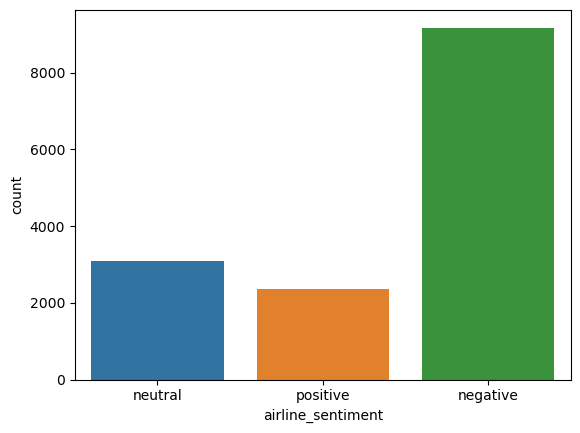

In [5]:
sns.countplot(data=df, x='airline_sentiment')

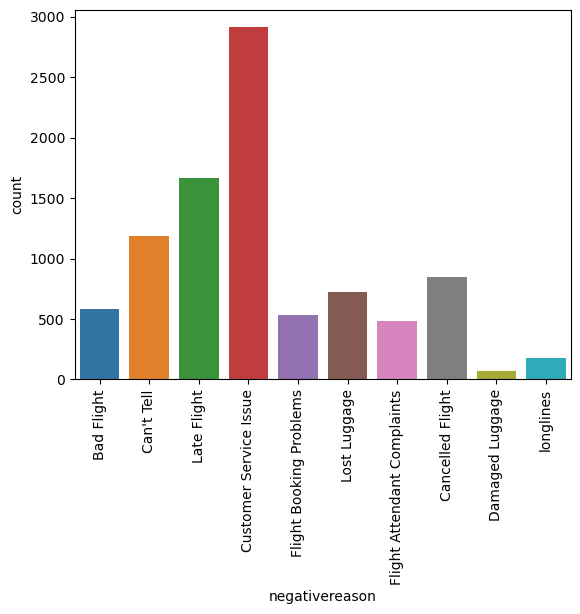

In [7]:
sns.countplot(data=df, x='negativereason')
plt.xticks(rotation=90);

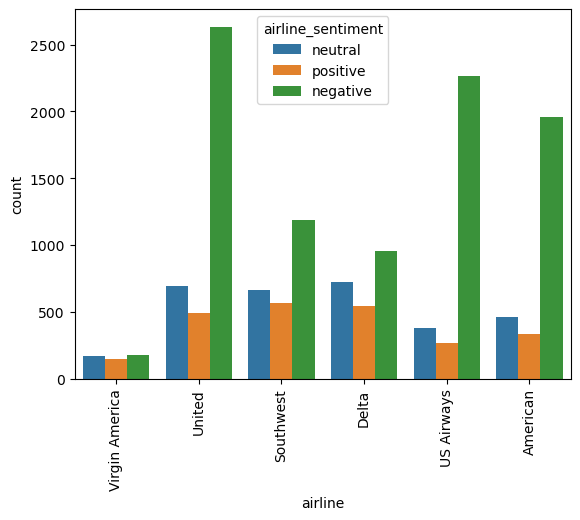

In [8]:
sns.countplot(data=df, x='airline', hue='airline_sentiment')
plt.xticks(rotation=90);

EXTRACT THE TEXT COLUMNS FOR ANALYSIS

In [9]:
data = df[['airline_sentiment','text']]

In [10]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


CREATE FEATURES AND LABELS

In [11]:
X = data.text
y = data.airline_sentiment

In [12]:
X

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [13]:
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

PERFORM A TRAIN TEST SPLIT

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

PERFROM VECTORIZATION

In [18]:
tfidf_vect = TfidfVectorizer(stop_words='english')

In [19]:
# fit and transform the vectorizer on the X_train
X_train_tfidf = tfidf_vect.fit_transform(X_train)

In [20]:
# transform the vectorizer on the X_test
X_test_tfidf = tfidf_vect.transform(X_test)

BUILDING MODELS

In [44]:
# create an instance of various models
nb = MultinomialNB()
log_model =LogisticRegression(max_iter=1000)
rbf_svc = SVC()
linear_svc = LinearSVC()

In [45]:
# fit the model on the x-train and y train
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [46]:
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [47]:
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [48]:
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

DEFINE A FUNCTION TO COMPARE THE PREDICTIONS FROM ALL MODELS

In [49]:
def report(a_model):
    preds = a_model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay.from_estimator(a_model,X_test_tfidf,y_test)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.80      2738
     neutral       0.78      0.15      0.25       947
    positive       0.91      0.15      0.26       707

    accuracy                           0.68      4392
   macro avg       0.78      0.43      0.43      4392
weighted avg       0.73      0.68      0.59      4392



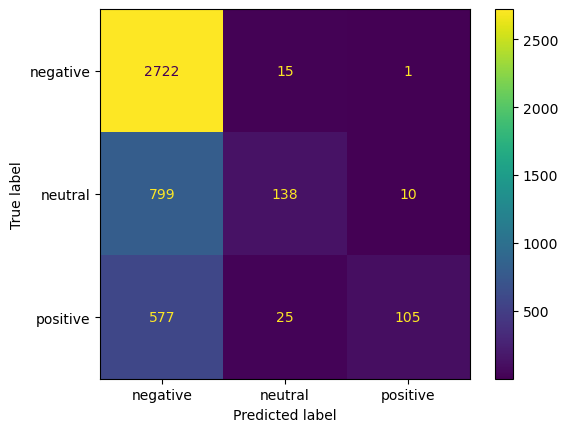

In [50]:
report(nb)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      2738
     neutral       0.64      0.47      0.54       947
    positive       0.81      0.57      0.67       707

    accuracy                           0.77      4392
   macro avg       0.75      0.66      0.69      4392
weighted avg       0.77      0.77      0.76      4392



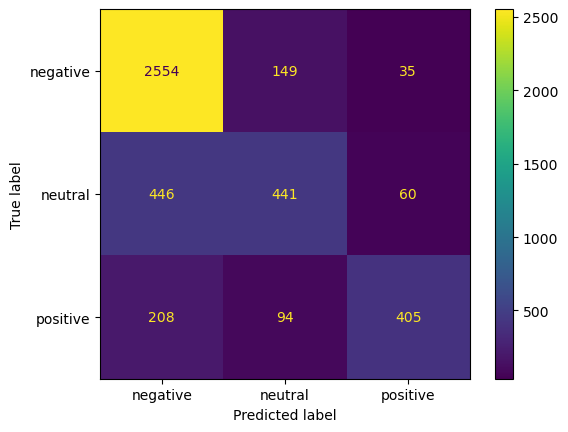

In [51]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.85      2738
     neutral       0.69      0.39      0.50       947
    positive       0.81      0.56      0.66       707

    accuracy                           0.77      4392
   macro avg       0.76      0.64      0.67      4392
weighted avg       0.76      0.77      0.75      4392



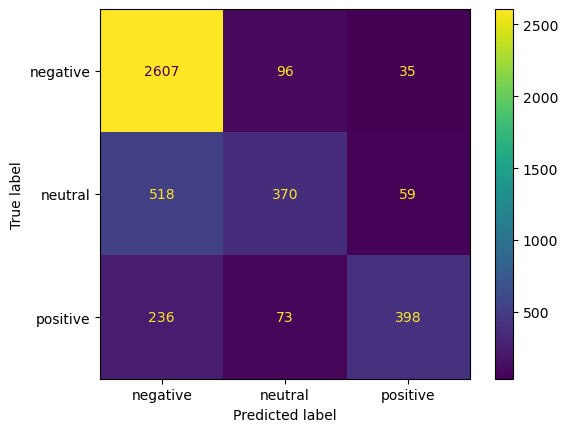

In [52]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      2738
     neutral       0.62      0.51      0.56       947
    positive       0.75      0.64      0.69       707

    accuracy                           0.78      4392
   macro avg       0.73      0.68      0.70      4392
weighted avg       0.77      0.78      0.77      4392



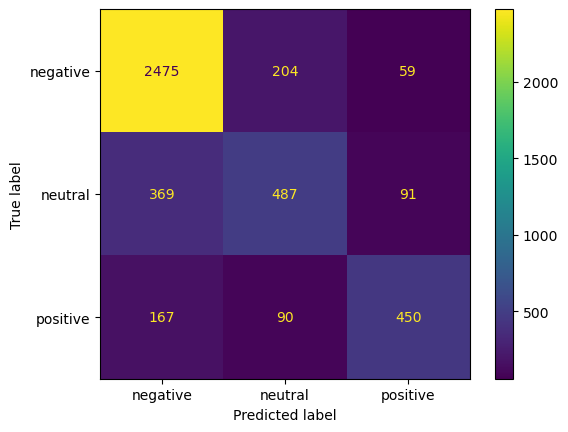

In [53]:
report(linear_svc)

CREATE A PIPELINE

In [56]:
pipeline = Pipeline([('tfidf',TfidfVectorizer()),
                    ('svc',LinearSVC())])

In [57]:
pipeline.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [61]:
pipeline.predict(['turbulent flight'])

array(['negative'], dtype=object)